# MAC Final Project: Dataset Overview and Use Case Examples
## EDS 220, Fall 2022


## Using Microsoft Planetary Computer Datasets to Examine Fire and Snow in California

#### Authors
- Meagan Brown, UC Santa Barbara, meagan_brown@ucsb.edu
- Andre Dextre, UC Santa Barbara, adextre@ucsb.edu
- Carlo Broderick, UC Santa Barbara, carlobroderick@ucsb.edu

## Table of Contents


[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id=‘purpose’></a>
### Purpose

Due to climate change, California has been impacted by extended periods of drought and decreasing snowpacks throughout recent years. Additionally, due to increased dry periods, wildfires in Califronia are also becoming more common. Utilizing Microsoft Planetary Computer API, we want to examine trends in California snowpack levels along with trends in wildfires through the state.



<a id=‘MPC’></a>
### Microsoft Planetary Computer

### STAC API

### Dask

<a id=‘overview’></a>
### Dataset Description
This portion of the notebook contains a summary description of the MPC environmental datasets used in this notebook and how to access them.

### gridMET
gridMET is a dataset of daily high-spatial resolution (~4-km, 1/24th degree) surface meteorological data covering the contiguous US from 1979-yesterday provided and maintained by the Climatology Lab out of UC Merced. The Climatology Lab generates the data from interpolating gridded climate data from PRISM (https://www.prism.oregonstate.edu/) and regional reanalysis from NLDAS-2 (https://ldas.gsfc.nasa.gov/nldas/NLDAS2forcing.php). The data is available through the Microsoft Planetary computer API and as a netCDF from the lab’s website. Microlimates on the scale os < 4km^2 and wind data on the scale of <32 km^2 are below the resolution threshold and will be difficult to analyse using this data set.
### MODIS Snow Cover 8-day
The MODIS Snow Cover 8-day dataset was created by the National Snow and Ice Data Center (a part of CIRES at the University of Colorado Boulder). The dataset provides global coverage with spatial resolution of snow cover extent observed over an eight-day period within 10degx10deg MODIS sinusoidal grid tiles. Tiles are generated by compositing 500 m observations from the ‘MODIS Snow Cover Daily L3 Global 500m Grid’ data set. Snow Cover data ranges from 02/18/2000 to present. The file format use to store the data is GeoTIFF (COG). We will access the data using Microsoft Planetary Computer which is a similar API to Google Earth Engine. There are no known issues with data quality that may affect our results.
### MODIS Thermal Anomalies/Fire 8-Day
The MODIS Thermal Anomalies/Fire 8-Day dataset was created by NASA LP DAAC at the USGS EROS Center (https://lpdaac.usgs.gov/products/mod14a2v061/) and Microsoft’s Planetary Computer (https://planetarycomputer.microsoft.com/dataset/modis-14A2-061).
This datasets expands from 02/18/2000 - Present and contains Global data  on thermal anomalies/fires at a 1 km spatial resolution. The file format use to store the data is GeoTIFF (COG) and HDF. We will access the data using Microsoft Planetary Computer which is a similar API to Google Earth Engine. There are no known issues with data quality that may affect our results.


<a id='io'></a> 
### Dataset Input/Output 

1) Import all necessary packages 
- pystac-client
- planetary-computer
- geopandas
- rich

2) Parameters:
- data are stored Microsoft Planetary Computer and can be accesed via the API outlined in mpc_example.ipynb notebook and can be browsed at: https://planetarycomputer.microsoft.com/
- Data temporal availability
-- MODIS Snow Cover 8-day (02/18/2000 – Present)
-- MODIS Thermal Anomalies/Fire 8-Day  (02/18/2000 – Present)
-- gridMET (01/01/1979 – 12/31/2020)
- California lat and lon

3) Examples of reading in data from Microsoft Planetary Computer are shown in the mpc_example.ipynb notebook.

In [51]:
# import libraries
%matplotlib inline
# to use the STAC API to interact with MPC
import pystac_client
# to log into and access MPC 
import planetary_computer
# to use pandas function of geographic data 
import geopandas
# to make a nice table of all satalite bands and attributes
import rich.table
# to display satalite images
from IPython.display import Image
# to recieve actual satalite data from MPC
import requests
# to make nice plots of satalite data
import matplotlib.pyplot as plt
# to interact with raster data
import rioxarray
# to interact with raster data
import xarray as xr
# to interact with and create mozsaic images
import rasterio.features
# to make mosaic images
import stackstac
# to numpy arrays
import numpy as np
# to do more xarray stuff, to install this on your environment use: xarray-spatial
import xrspatial.multispectral as ms
# we will not be using this library, but it is here to show that MPC allows the use of cluster computation; 
# however, this must be done on their "hub."
from dask_gateway import GatewayCluster


In [52]:
# Connect with Microsoft Planetary Computer (MPC)
# Using the STAC API we create access the catalog of satalite images from MPC
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# MPC Metadata
print(catalog.id)
print(catalog.description)
print(catalog.title)

microsoft-pc
Searchable spatiotemporal metadata describing Earth science datasets hosted by the Microsoft Planetary Computer
Microsoft Planetary Computer STAC API


In [53]:
# specify presets 
time_range = "2020-12-01/2020-12-31"
bbox = [-120, 34.5, -119, 35]
source_landsat = "landsat-8-c2-l2"
source_snow = "modis-10A2-061"
source_fire = "modis-14A2-061"
source_gridMET = "gridmet"

# select the satalite collection within the MPC catalog and turn them into list of items. 
# While selecting we specify our presets such as the date and location of interest
search_landsat = catalog.search(collections=[source_landsat],query = {"eo:cloud_cover": {"lt": 25}}, bbox=bbox, datetime=time_range)
items_landsat = search_landsat.get_all_items()

search_snow = catalog.search(collections=[source_snow], bbox=bbox, datetime=time_range)
items_snow = search_snow.get_all_items()

search_fire = catalog.search(collections=[source_fire], bbox=bbox, datetime=time_range)
items_fire = search_fire.get_all_items()

search_gridMET = catalog.search(collections=[source_gridMET], bbox=bbox, datetime=time_range)
items_gridMET = search_gridMET.get_all_items()



In [54]:
#id(items_landsat)
#print(pystac.items_landsat.description)
#dir(search_landsat)
#type(items_landsat)

len(items_landsat)
#items_landsat

#items_snow

#len(items_gridMET)

#print(items_landsat.__doc__)

#print(items_landsat.to_dict)
#print(items_landsat.description)
#print(items_landsat.extent)
#print(items_landsat.title)
#print(items_landsat.stac_extensions)

#type(items_landsat)


2

<a id='display'></a> 
### Metadata Display and Basic Visualization



<AxesSubplot: >

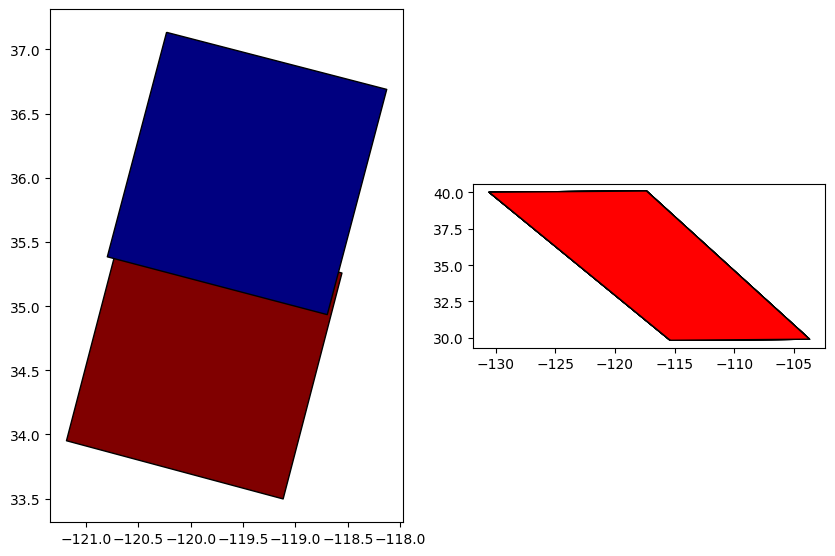

In [55]:
# We can turn the above previously created list of items into a geopandas dataframe
# this df now has a row for each item (each image taken as the satalite passed over the area of interest during our specified time range)
# for the example landsat data we have 4 images taken
# each column is a property of the item (such as the date, location, cloud cover, etc)
# the geometry column represents a polygon that has the edges of our image, the raster data is not present until requested via API.
df_landsat = geopandas.GeoDataFrame.from_features(items_landsat.to_dict(), crs="epsg:4326")
df_snow = geopandas.GeoDataFrame.from_features(items_snow.to_dict(), crs="epsg:4326")
df_fire = geopandas.GeoDataFrame.from_features(items_fire.to_dict(), crs="epsg:4326")
#df_gridMET = geopandas.GeoDataFrame.from_features(items_gridMET.to_dict(), crs="epsg:4326")


# plot our items
#df_landsat.plot(cmap = "jet", edgecolor = "black", column = "landsat:scene_id", figsize = (10,10))
#df_snow.plot(color = "red", edgecolor = "black", figsize = (10,10))
#df_fire.plot(color = "red", edgecolor = "black", figsize = (10,10))
#df_gridMET.plot(color = "red", edgecolor = "black", figsize = (10,10))

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (10,8))
df_landsat.plot(ax = ax1, cmap = "jet", edgecolor = "black", column = "landsat:scene_id", figsize = (5,5))
df_snow.plot(ax = ax2, color = "red", edgecolor = "black", figsize = (10,10))


In [56]:
df_landsat

,geometry,datetime,platform,proj:bbox,proj:epsg,description,instruments,eo:cloud_cover,view:off_nadir,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,view:sun_elevation,landsat:cloud_cover_land,landsat:processing_level,landsat:collection_number,landsat:collection_category
0,"POLYGON ((-120.62601 35.70559, -118.55613 35.2...",2020-12-01T18:34:51.897424Z,landsat-8,"[120885.0, 3713685.0, 355815.0, 3952515.0]",32611,Landsat Collection 2 Level-2 Surface Reflectan...,"[oli, tirs]",0.11,0,036,LC80420362020336LGN00,042,2,160.011786,30.778304,0.18,L2SP,02,T1
1,"POLYGON ((-120.23044 37.13271, -118.12868 36.6...",2020-12-01T18:34:28.014858Z,landsat-8,"[162285.0, 3871785.0, 397215.0, 4110315.0]",32611,Landsat Collection 2 Level-2 Surface Reflectan...,"[oli, tirs]",0.86,0,035,LC80420352020336LGN00,042,2,160.610003,29.515247,0.86,L2SP,02,T1


In [57]:
# filter out clouds
# the geopandas dataframe has a column called "eo:cloud_cover" which is the percentage of the image that is covered by clouds
# here outside of the geopandas df we select the item with the minimum cloud cover
# this item represents a single satalite image taken between the specified time range at the location of interest with the least amount of cloud cover
# the function below uses the key = lambda argument for the min function to allow us to select the item in the list with the minimum cloud cover

selected_item = min(items_landsat, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item.assets.items)



<built-in method items of dict object at 0x7fe04b98b580>


In [58]:
# create table of bands/Assets and descriptions
# Each STAC item has one or more Assets, which include links to the actual files.
# note some of these are bands and some of these like the last row are a true color preview of the satalite image
table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key                 ┃ Description                                    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ANG                       │ Angle Coefficients File                        │
│ SR_B1                     │ Coastal/Aerosol Band (B1)                      │
│ SR_B2                     │ Blue Band (B2)                                 │
│ SR_B3                     │ Green Band (B3)                                │
│ SR_B4                     │ Red Band (B4)                                  │
│ SR_B5                     │ Near Infrared Band 0.8 (B5)                    │
│ SR_B6                     │ Short-wave Infrared Band 1.6 (B6)              │
│ SR_B7                     │ Short-wave Infrared Band 2.2 (B7)              │
│ ST_QA                     │ Surface Temperature Quality Assessment Band    │
│ ST_B10                    │ Surface Temperature Band (B10)                 │
│ MTL.txt                   │ Product Metadata File                          │
│ MTL.xml                   │ Product Metadata File (xml)                    │
│ ST_DRAD                   │ Downwelled Radiance Band                       │
│ ST_EMIS                   │ Emissivity Band                                │
│ ST_EMSD                   │ Emissivity Standard Deviation Band             │
│ ST_TRAD                   │ Thermal Radiance Band                          │
│ ST_URAD                   │ Upwelled Radiance Band                         │
│ MTL.json                  │ Product Metadata File (json)                   │
│ QA_PIXEL                  │ Pixel Quality Assessment Band                  │
│ ST_ATRAN                  │ Atmospheric Transmittance Band                 │
│ ST_CDIST                  │ Cloud Distance Band                            │
│ QA_RADSAT                 │ Radiometric Saturation Quality Assessment Band │
│ thumbnail                 │ Thumbnail image                                │
│ SR_QA_AEROSOL             │ Aerosol Quality Analysis Band                  │
│ reduced_resolution_browse │ Reduced resolution browse image                │
│ tilejson                  │ TileJSON with default rendering                │
│ rendered_preview          │ Rendered preview                               │
└───────────────────────────┴────────────────────────────────────────────────┘

In [59]:
#Generate Image
selected_item.assets["rendered_preview"].to_dict()
Image(url=selected_item.assets["rendered_preview"].href, width=500)

In [75]:
signed_href = planetary_computer.sign(selected_item).assets["SR_B2"].href



signed_href

AttributeError: 'str' object has no attribute 'status_code'

<xarray.DataArray (y: 149, x: 5)>
[745 values with dtype=uint16]
Coordinates:
    band         int64 1
  * x            (x) float64 2.173e+05 2.182e+05 2.192e+05 2.201e+05 2.211e+05
  * y            (y) float64 3.856e+06 3.855e+06 ... 3.715e+06 3.714e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

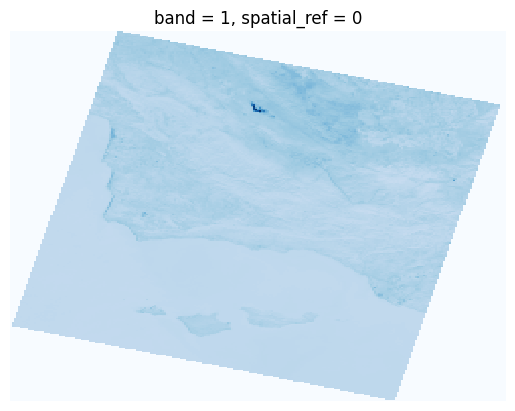

In [61]:
ds = rioxarray.open_rasterio(signed_href, overview_level=4).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

ds.dims
ds.coords
ds.attrs

ds[100:1005, 100:105]


In [72]:
data = (
    stackstac.stack(
        items_landsat,
        assets=["SR_B4", "SR_B3", "SR_B2"],  # red, green, blue
        chunksize=4096,
        resolution=100,
    ))
data

<xarray.DataArray 'stackstac-91df56e0c88b28e12c6d5f2d0873c985' (time: 2,
                                                                band: 3,
                                                                y: 3968, x: 2765)>
dask.array<fetch_raster_window, shape=(2, 3, 3968, 2765), dtype=float64, chunksize=(1, 1, 3968, 2765), chunktype=numpy.ndarray>
Coordinates: (12/27)
  * time                         (time) datetime64[ns] 2020-12-01T18:34:28.01...
    id                           (time) <U31 'LC08_L2SP_042035_20201201_02_T1...
  * band                         (band) <U5 'SR_B4' 'SR_B3' 'SR_B2'
  * x                            (x) float64 1.208e+05 1.209e+05 ... 3.972e+05
  * y                            (y) float64 4.11e+06 4.11e+06 ... 3.714e+06
    platform                     <U9 'landsat-8'
    ...                           ...
    gsd                          float64 30.0
    title                        (band) <U15 'Red Band (B4)' ... 'Blue Band (...
    common_name                  (band) <U5 'red' 'green' 'blue'
    center_wavelength            (band) float64 0.65 0.56 0.48
    full_width_half_max          (band) float64 0.04 0.06 0.06
    epsg                         int64 32611
Attributes:
    spec:        RasterSpec(epsg=32611, bounds=(120800, 3713600, 397300, 4110...
    crs:         epsg:32611
    transform:   | 100.00, 0.00, 120800.00|\n| 0.00,-100.00, 4110400.00|\n| 0...
    resolution:  100

In [ ]:
requests.head(selected_item.assets["blue"].href).status_code

In [74]:
median = data.median(dim = "time")

In [65]:
image = ms.true_color(*median)  # expects red, green, blue DataArrays

RuntimeError: Error opening 'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2020/042/036/LC08_L2SP_042036_20201201_20210312_02_T1/LC08_L2SP_042036_20201201_20210312_02_T1_SR_B4.TIF?st=2022-11-26T22%3A19%3A02Z&se=2022-11-27T23%3A04%3A02Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2022-11-27T16%3A11%3A10Z&ske=2022-12-04T16%3A11%3A10Z&sks=b&skv=2021-06-08&sig=65Vo5bcq9ei5/D9ZW5fA6zoHu9xAwKi2GZgBuafLYJQ%3D': RasterioIOError("'/vsicurl/https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/oli-tirs/2020/042/036/LC08_L2SP_042036_20201201_20210312_02_T1/LC08_L2SP_042036_20201201_20210312_02_T1_SR_B4.TIF?st=2022-11-26T22%3A19%3A02Z&se=2022-11-27T23%3A04%3A02Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2022-11-27T16%3A11%3A10Z&ske=2022-12-04T16%3A11%3A10Z&sks=b&skv=2021-06-08&sig=65Vo5bcq9ei5/D9ZW5fA6zoHu9xAwKi2GZgBuafLYJQ%3D' does not exist in the file system, and is not recognized as a supported dataset name.")

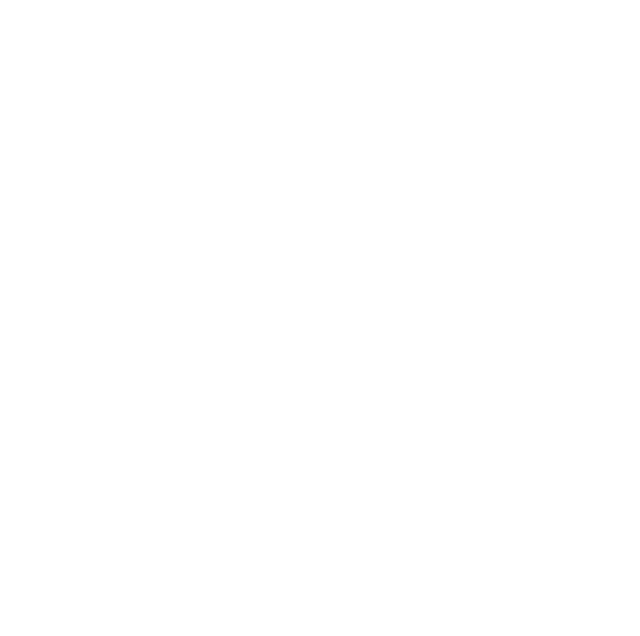

In [69]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.set_axis_off()
image.plot.imshow(ax=ax);

<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. 

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

List relevant references. Here are some additional resources on creating professional, shareable notebooks you may find useful:
